In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chemin=r"C:\Users\dell\Documents\Perso\Deep_Learning_TF_2_Notebooks_et_Datasets\03-ANNs\cancer_classification.csv"
df=pd.read_csv(chemin)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
#EDA
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

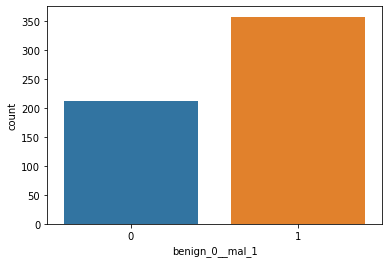

In [4]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

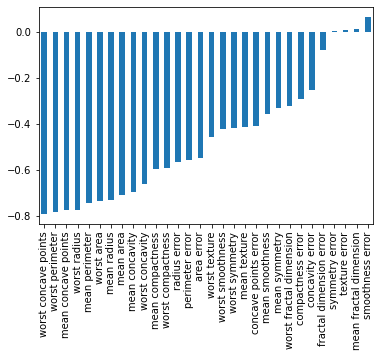

In [5]:
#vérifier la corrélations de notre label avec les features
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

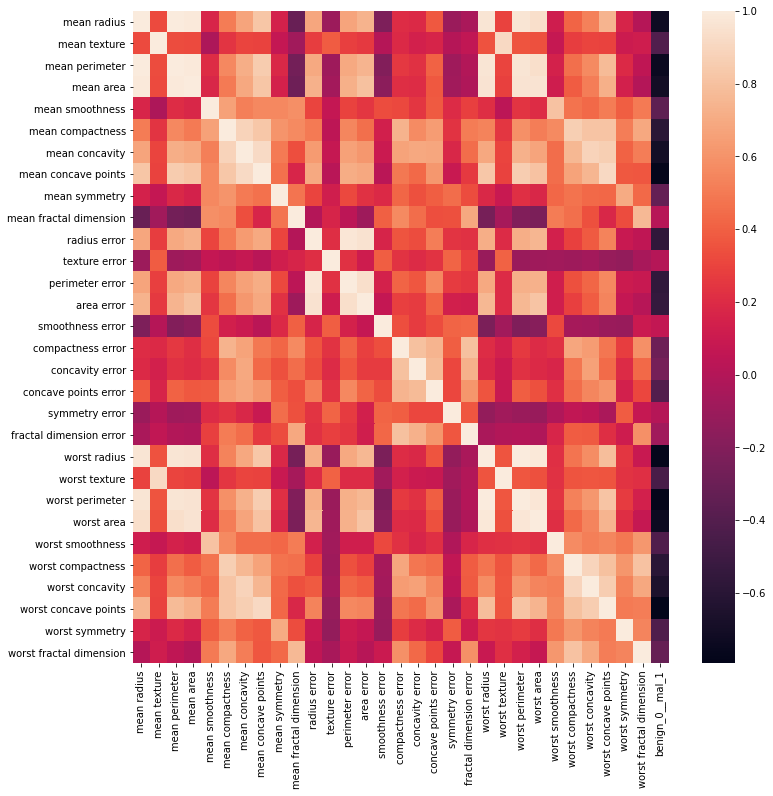

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[:-1])

In [7]:
#récupération les valeurs features et du label
X= df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
#Création du modèle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
X_train.shape   #nombre de colonne X_train nous donne le nombre de neurone

(426, 30)

In [16]:
model= Sequential()

input_layer=Dense(units=30, activation='relu')
hid_layer1=Dense(units=15, activation='relu')
output_layer=Dense(units=1, activation='sigmoid')

model.add(input_layer)
model.add(hid_layer1)
model.add(output_layer)

model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6881 - val_loss: 0.6606
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6467 - val_loss: 0.6140
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6013 - val_loss: 0.5513
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5358 - val_loss: 0.4741
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4732 - val_loss: 0.4126
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4223 - val_loss: 0.3579
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3748 - val_loss: 0.3122
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3378 - val_loss: 0.2764
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3058 - val_loss: 0.2464
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2786 - val_loss: 0.2227
Epoch 11

In [18]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.688119,0.660591
1,0.646671,0.613965
2,0.601323,0.551320
3,0.535787,0.474089
4,0.473183,0.412559
...,...,...
595,0.000715,0.248241
596,0.000809,0.274181
597,0.001185,0.235859
598,0.000749,0.281913


<AxesSubplot:>

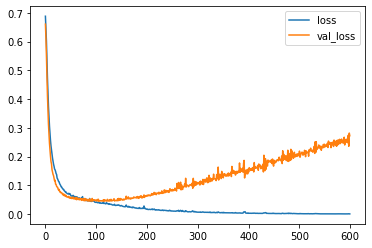

In [19]:
losses.plot()

In [20]:
model= Sequential()

input_layer=Dense(units=30, activation='relu')
hid_layer1=Dense(units=15, activation='relu')
output_layer=Dense(units=1, activation='sigmoid')

model.add(input_layer)
model.add(hid_layer1)
model.add(output_layer)

model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6837 - val_loss: 0.6587
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6433 - val_loss: 0.6129
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6014 - val_loss: 0.5635
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5560 - val_loss: 0.5073
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5072 - val_loss: 0.4501
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4581 - val_loss: 0.3977
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4118 - val_loss: 0.3490
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3705 - val_loss: 0.3058
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3360 - val_loss: 0.2713
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2992 - val_loss: 0.2386
Epoch 11

In [24]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.683662,0.658696
1,0.643327,0.612902
2,0.601415,0.563520
3,0.555979,0.507296
4,0.507194,0.450145
...,...,...
133,0.035040,0.047043
134,0.033333,0.046714
135,0.034947,0.049710
136,0.033973,0.046958


<AxesSubplot:>

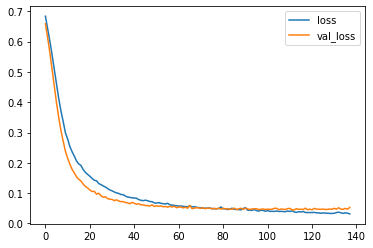

In [25]:
losses.plot()


In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model= Sequential()

input_layer=Dense(units=30, activation='relu')
hid_layer1=Dense(units=15, activation='relu')
output_layer=Dense(units=1, activation='sigmoid')

model.add(input_layer)
model.add(Dropout(rate=0.5))
model.add(hid_layer1)
model.add(Dropout(rate=0.5))
model.add(output_layer)


model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6926 - val_loss: 0.6758
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6865 - val_loss: 0.6488
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6623 - val_loss: 0.6316
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6487 - val_loss: 0.6125
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6442 - val_loss: 0.5907
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6070 - val_loss: 0.5663
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5420
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5685 - val_loss: 0.5164
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5673 - val_loss: 0.4877
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5427 - val_loss: 0.4684
Epoch 11

In [29]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.692580,0.675837
1,0.686476,0.648813
2,0.662337,0.631590
3,0.648660,0.612509
4,0.644221,0.590675
...,...,...
274,0.083092,0.043788
275,0.073491,0.049487
276,0.081158,0.042683
277,0.072910,0.043189


<AxesSubplot:>

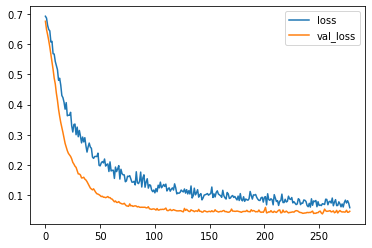

In [30]:
losses.plot()

In [34]:
predictions=(model.predict(X_test)>0.5).astype('int32')
predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [37]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 1 88]]
